In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

Reading Election Data and India map file(.shp file)

In [2]:
election_data= pd.read_csv("Datasets\General Election Data.csv")

india_map= gpd.read_file("India Map\India Map 1977\india_map_1977.shp")

poverty_data_77= pd.read_csv("Datasets\Poverty data 1977-78.csv", skiprows=5, skipfooter=17,names=["states", "rural_absolute", "rural_precentage", "urban_absolute","urban_precentage", "combined_absolute", "combained_precentage" ])
poverty_data_73= pd.read_csv("Datasets\Poverty data 1972-73.csv", skiprows=5, skipfooter=12,names=["states", "rural_absolute", "rural_precentage", "urban_absolute","urban_precentage", "combined_absolute", "combained_precentage" ])

poverty_data_73.set_index("states", inplace=True)
poverty_data_77.set_index("states", inplace=True)

In [3]:
#Calculating state-wise average vote share of Congress candidates in 1971 election
inc_1971=election_data[(election_data['Year']==1971) & (election_data["Party"]=="INC")]         
inc_1971=inc_1971.groupby("State_Name")

inc_1971= inc_1971.Vote_Share_Percentage.agg(np.mean)


#Calculating state-wise average vote share of Congress candidates in 1977 election
inc_1977=election_data[(election_data['Year']==1977) & (election_data["Party"]=="INC")]         
inc_1977=inc_1977.groupby("State_Name")

inc_1977= inc_1977.Vote_Share_Percentage.agg(np.mean)


#Calculating diffrence in state-wise average vote share among the 1971 and 1977 election
vote_diff= inc_1977 - inc_1971

In [4]:

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))
        


### Who voted for Ms. Gandhi, rich or poor?
    It is commonly believed that rich states voted for Ms. Gandhi or in favor of of Emergency in 1977 election. The below chart seems to suggest the opposite. While the vote share of congress came down everywhere except 4 states, the decline in vote share is much more steeper in richer states than in poorer states. 
    
    

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


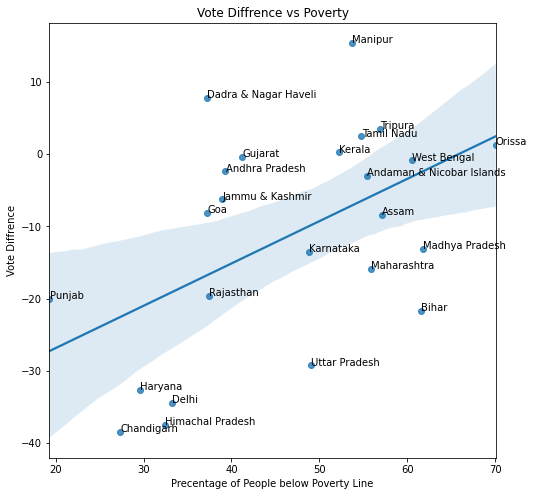

In [6]:
india_map= gpd.read_file("India Map\India Map 1977\india_map_1977.shp")

india_map=india_map.merge(poverty_data_77["combained_precentage"], left_on="States", right_on="states")
india_map=india_map.merge(inc_1977, left_on="States", right_on="State_Name" )
india_map=india_map.merge(vote_diff, left_on="States", right_on="State_Name", )

india_map.rename(columns={"Vote_Share_Percentage_x":"vote_share_1977", "Vote_Share_Percentage_y":"vote_diff"}, inplace=True)

plt.figure(figsize=(8,8))
ax=sns.regplot(data=india_map, x="combained_precentage", y="vote_diff")
plt.title("Vote Diffrence vs Poverty")
plt.xlabel("Precentage of People below Poverty Line")
plt.ylabel("Vote Diffrence")

label_point(india_map["combained_precentage"], india_map["vote_diff"], india_map.States, ax=ax )

In [7]:
india_map.head()

,States,geometry,combained_precentage,vote_share_1977,vote_diff
0,Andaman & Nicobar Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",55.42,58.450000,-3.030000
1,Andhra Pradesh,"MULTIPOLYGON (((81.10380 17.82269, 81.10610 17...",39.31,57.584524,-2.386828
2,Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",58.32,41.250000,NaN
3,Assam,"MULTIPOLYGON (((95.96661 27.94694, 95.95369 27...",57.15,51.427857,-8.462912
4,Bihar,"POLYGON ((87.79328 25.22107, 87.79086 25.20967...",61.55,23.348333,-21.694007


In [65]:
india_map.corr(method="spearman")

,combained_precentage,vote_share_1977,vote_diff
combained_precentage,1.000000,0.197044,0.447826
vote_share_1977,0.197044,1.000000,0.611304
vote_diff,0.447826,0.611304,1.000000
